In [1]:
%autosave 0
from IPython.core.display import HTML, display
display(HTML('<style>.container { width:100% !important; } </style>'))

# Support Vector Machines

This notebook discusses <em style="color:blue;">support vector machines</em>.  In order to understand why we need support vector machines (abbreviated as SVMs), we 
will first demonstrate that classifiers constructed with <em style="color:blue;">logistic regression</em> sometimes behave unintuitively.

## The Problem with Logistic Regression

In this section of the notebook we discuss an example that demonstrates that logistic regression is not necessarily the best classifier we can get. 

In [2]:
import numpy                as np
import matplotlib.pyplot    as plt
import seaborn              as sns
import sklearn.linear_model as lm

We construc a small data set containing just three points.

In [3]:
X = np.array([[1.00, 2.00],
              [2.00, 1.00],
              [3.50, 3.50]])
Y = np.array([0, 
              0, 
              1])

To proceed, we will plot the data points using a scatter plot.  Furthermore, we plot a green line that intuitively make the best decision boundary.

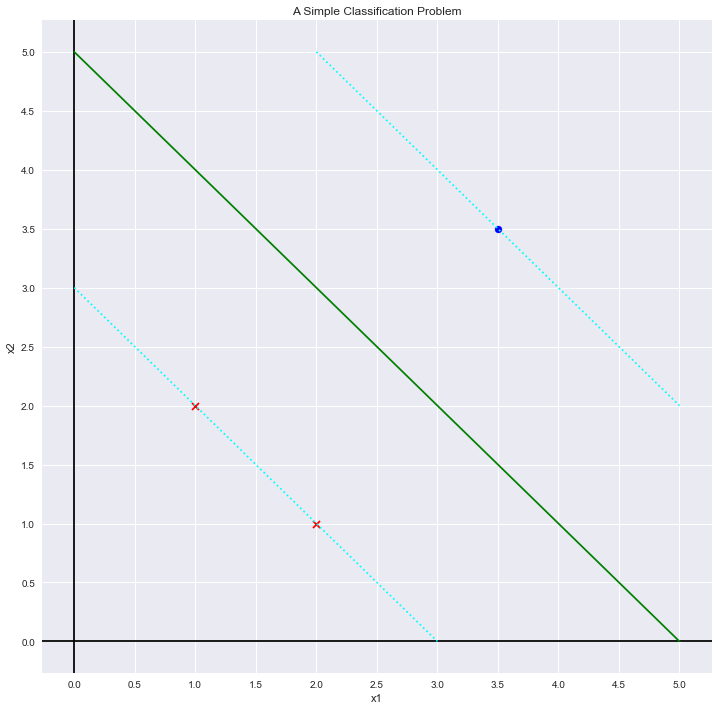

In [4]:
plt.figure(figsize=(12, 12))
Corner = np.array([[0.0, 5.0], [5.0, 0.0]])
X_pass = X[Y == 1]
X_fail = X[Y == 0]
sns.set(style='darkgrid')
plt.title('A Simple Classification Problem')
plt.axvline(x=0.0, c='k')
plt.axhline(y=0.0, c='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(np.arange(0.0, 5.1, step=0.5))
plt.yticks(np.arange(0.0, 5.1, step=0.5))
X1 = np.arange(0, 5.05, 0.05)
X2 = 5 - X1
plt.plot(X1, X2, color='green', linestyle='-')
X1 = np.arange(0, 3.05, 0.05)
X2 = 3 - X1
plt.plot(X1, X2, color='cyan', linestyle=':')
X1 = np.arange(2.0, 5.05, 0.05)
X2 = 7 - X1
plt.plot(X1, X2, color='cyan', linestyle=':')
plt.scatter(Corner[:,0], Corner[:,1], color='white', marker='.')
plt.scatter(X_pass[:,0], X_pass[:,1], color='b', marker='o') # class 1 is blue
plt.scatter(X_fail[:,0], X_fail[:,1], color='r', marker='x') # class 2 is red

If we want to separate the two red crosses at $(1,2)$ and $(2,1)$  from the blue bullet at $(3.5, 3.5)$, then the decision boundary that would create the 
widest margin between these points would be given by the green line.  The *road* separating these points would have a width of $4 \cdot \sqrt{2}$. 

Let us classify these data using logistic regression and see what we get.  We will plot the <b style="color:blue;">decision boundary</b>.  If $\vartheta_0$, $\vartheta_1$, and $\vartheta_2$ are the parameters of the logistic model, then the decision boundary is given by the linear equation
$$ \vartheta_0 + \vartheta_1 \cdot x_1 + \vartheta_2 \cdot x_2 = 0. $$
This can be rewritten as
$$ x_2 = - \frac{\vartheta_0 + \vartheta_1 \cdot x_1}{\vartheta_2}. $$
The function $\texttt{plot_data_and_boundary}(X, Y, \vartheta_0, \vartheta_1, \vartheta_2)$ takes the data $X$, their classes $Y$ and the parameters 
$\vartheta_0$, $\vartheta_1$, and $\vartheta_2$ of the logistic model as inputs and plots the data and the decision boundary.     

In [5]:
def plot_data_and_boundary(X, Y, ϑ0, ϑ1, ϑ2):
    Corner = np.array([[0.0, 5.0], [5.0, 0.0]])
    X_pass = X[Y == 1]
    X_fail = X[Y == 0]
    plt.figure(figsize=(12, 12))
    sns.set(style='darkgrid')
    plt.title('A Simple Classification Problem')
    plt.axvline(x=0.0, c='k')
    plt.axhline(y=0.0, c='k')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xticks(np.arange(0.0, 5.1, step=0.5))
    plt.yticks(np.arange(0.0, 5.1, step=0.5))
    plt.scatter(Corner[:,0], Corner[:,1], color='white', marker='.')
    plt.scatter(X_pass[:,0], X_pass[:,1], color='blue' , marker='o') 
    plt.scatter(X_fail[:,0], X_fail[:,1], color='red'  , marker='x')  
    a  = max(- (ϑ0 + ϑ2 * 5)/ϑ1, 0)
    b  = min(- ϑ0/ϑ1           , 5)
    a, b = min(a, b), max(a, b)
    X1 = np.arange(a, b+0.05, 0.05)
    X2 = -(ϑ0 + ϑ1 * X1)/ϑ2
    print('slope of decision boundary', -ϑ1/ϑ2)
    plt.plot(X1, X2, color='green')

The function $\texttt{train_and_plot}(X, Y)$ takes a design matrix $X$ and a vector $Y$ containing zeros and ones.  It builds a regression model and plots the data together with the decision boundary.

In [6]:
def train_and_plot(X, Y):
    M = lm.LogisticRegression(C=1000000, solver='lbfgs')
    M.fit(X, Y)
    ϑ0     = M.intercept_[0]
    ϑ1, ϑ2 = M.coef_[0]
    plot_data_and_boundary(X, Y, ϑ0, ϑ1, ϑ2)

slope of decision boundary -1.0


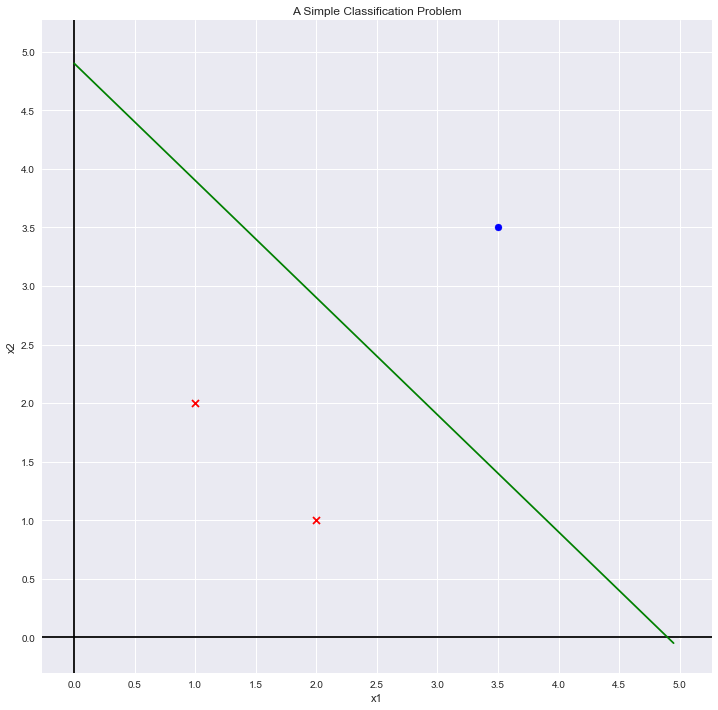

In [7]:
train_and_plot(X, Y)

Whe decision boundary is closer to the blue data point than to the red data points.  This is not optimal.

The function $\texttt{gen_X_Y}(n)$ take a natural number $n$ and generates additional data.  The number $n$ is the number of blue data points.
Concretly, it will add $n-1$ data points to the right of the blue dot shown above.  This should not really change the decision boundary as the data 
do not provide any new information.  After all, these data are to the right of the first blue dot and hence should share the class of this data point.

In [8]:
def gen_X_Y(n):
    X = np.array([[1.0, 2.0], [2.0, 1.0]] +
                 [[3.5 + k*0.05, 3.5] for k in range(n)])
    Y = np.array([0, 0] + [1] * n)
    return X, Y

slope of decision boundary -8.724825052352381


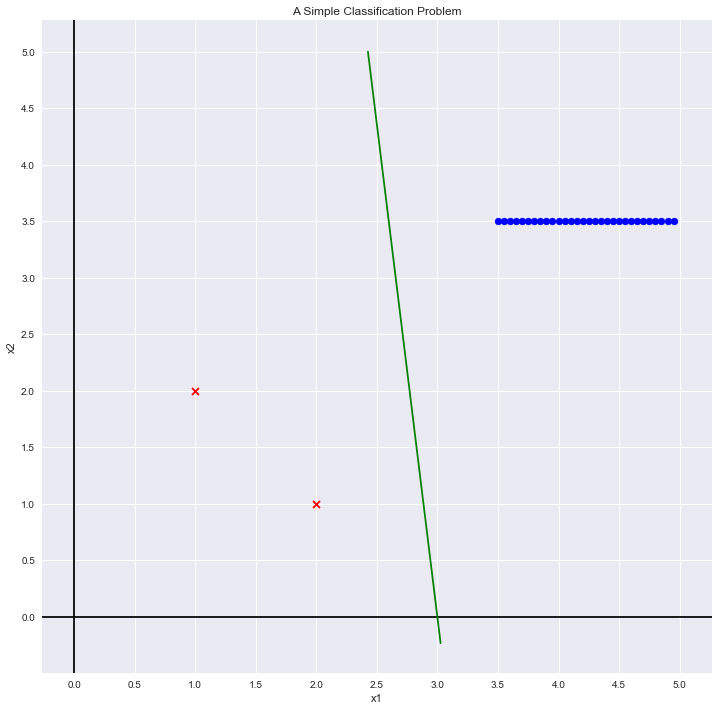

In [9]:
X, Y = gen_X_Y(30)
train_and_plot(X, Y)

When we test logistic regression with this data set, we see that the slope of the decision boundary is much steeper now and the separation of the blue dots from the red crosses is far worth than it needs to be had the optimal decision boundary been computed.

Let us see how <em style="color:blue;">support vector machines</em> deal with these data.

In [10]:
import sklearn.svm as svm

First, we construct a support vector machine with a linear kernel and next to no regularization and train it with the data.

In [11]:
M = svm.SVC(kernel='linear', gamma=1.5, C=10000)
M.fit(X, Y)
M.score(X, Y)

1.0

The following function is used for plotting.

In [12]:
def plot_data_and_boundary(X, Y, M, title):
    Corner = np.array([[0.0, 5.0], [5.0, 0.0]])
    X0, X1 = X[:, 0], X[:, 1]
    XX, YY = np.meshgrid(np.arange(0, 5, 0.005), np.arange(0, 5, 0.005))
    Z = M.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.figure(figsize=(12, 12))
    sns.set(style='darkgrid')
    plt.contour(XX, YY, Z)
    plt.scatter(Corner[:,0], Corner[:,1], color='black', marker='.')
    plt.scatter(X0, X1, c=Y, edgecolors='k')
    plt.xlim(XX.min(), XX.max())
    plt.ylim(YY.min(), YY.max())
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xticks()
    plt.yticks()
    plt.title(title)

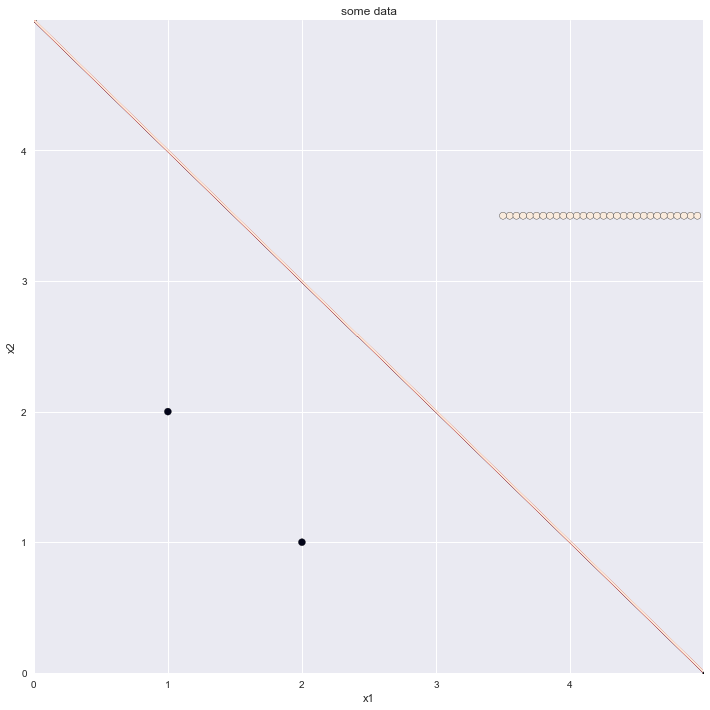

In [13]:
plot_data_and_boundary(X, Y, M, 'some data')

The decision boundary separates the data perfectly because it maximizes the distance of the data from the boundary.

In [14]:
X = np.array([[1.00, 2.00],
              [2.00, 1.00],
              [3.50, 3.50]])
Y = np.array([0, 
              0, 
              1])

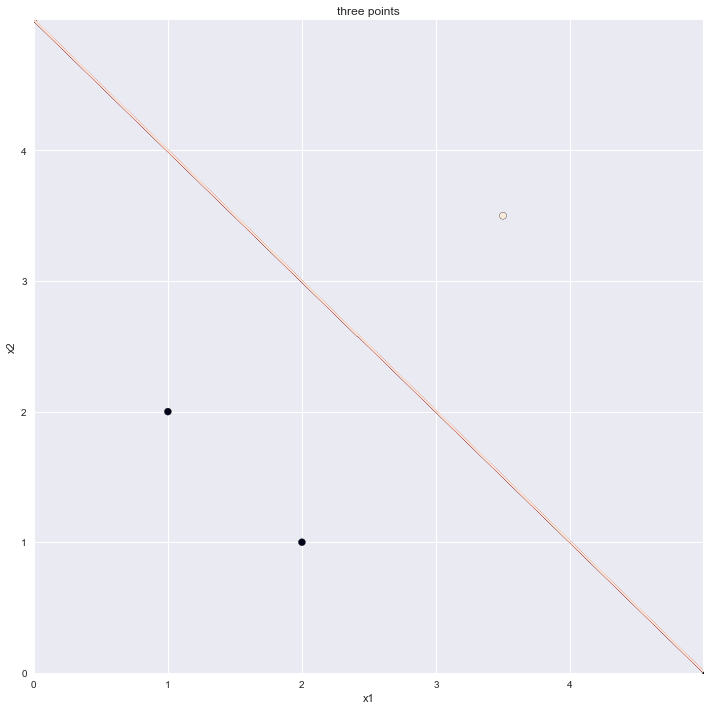

In [15]:
plot_data_and_boundary(X, Y, M, 'three points')

In [16]:
import pandas as pd

Lets load some strange data that I have found somewhere.

In [17]:
DF = pd.read_csv('strange-data.csv')
DF.head()

,x1,x2,y
0,0.10714,0.60307,1
1,0.09332,0.64985,1
2,0.09793,0.70541,1
3,0.15553,0.78436,1
4,0.21083,0.86623,1


In [18]:
X = np.array(DF[['x1', 'x2']])
Y = np.array(DF['y'])
Red  = X[Y == 1]
Blue = X[Y == 0]

In [19]:
M = svm.SVC(kernel='rbf', gamma=400.0, C=10000)
M.fit(X, Y)
M.score(X, Y)

1.0

Text(0.5,1,'Strange Data')

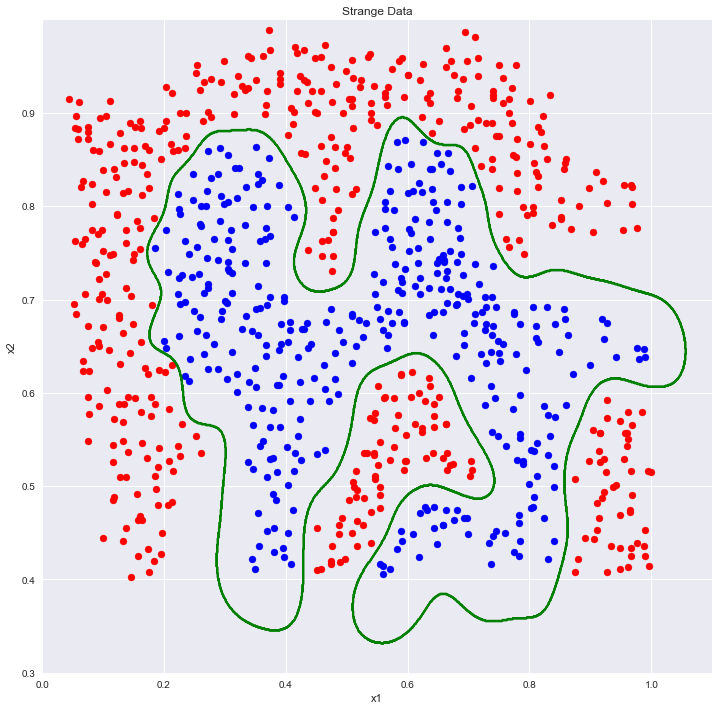

In [20]:
X0, X1 = X[:, 0], X[:, 1]
XX, YY = np.meshgrid(np.arange(0.0, 1.1, 0.001), np.arange(0.3, 1.0, 0.001))
Z = M.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.figure(figsize=(12, 12))
plt.contour(XX, YY, Z, colors='green')
plt.scatter(Blue[:, 0], Blue[:, 1], color='blue')
plt.scatter(Red [:, 0], Red [:, 1], color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Strange Data')

This example shows that support vector machines with Gaussian kernel can describe very complicated structures.